In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
M= pd.read_csv("train.csv")

df = pd.DataFrame(M)

df = df[np.isfinite(df['Age'])]
df = df[np.isfinite(df['Fare'])]
columns_for_differencing = ['PassengerId','Name','Ticket','Cabin','Embarked','Parch','SibSp','Pclass']
X_train= df.copy()[df.columns.difference(columns_for_differencing)]

X_train=X_train.apply(lambda sex: pd.factorize(sex, sort=False)[0])

X_traind=X_train[X_train.Survived == 0]
X_trains=X_train[X_train.Survived == 1]
X_traind=X_traind.values

X_trains=X_trains.values
X_train=X_train.values


In [3]:
S= pd.read_csv("test.csv")

df1 = pd.DataFrame(S)

#df1 = df1[np.isfinite(df1['Age'])]
#df1 = df1[np.isfinite(df1['Fare'])]
columns_for_differencing = ['PassengerId','Name','Ticket','Cabin','Embarked','Parch','SibSp','Pclass']
X_test= df1.copy()[df1.columns.difference(columns_for_differencing)]

X_test=X_test.apply(lambda sex: pd.factorize(sex, sort=False)[0])

X_test=X_test.values
print(len(X_test))

418


In [4]:
def hist(n):
    a,b,c=plt.hist(X_train[:,n],color='green') 
    x,y,z=plt.hist(X_trains[:,n])
    counts, bins, bars=a,b,c
    a=np.array(a)
    b=np.array(b)
    x=np.array(x)
    y=np.array(y)
    

    

In [5]:
def mean(x):
    mean=sum(x)/len(x)
    return mean

def std(x):
    std=(sum((x-mean(x))**2))/len(x)
    std=np.sqrt(std)
    return(std)

def probability(xi,x):
    y=np.exp(-((xi-mean(x))**2)/(2*std(x)**2))/(std(x)*np.sqrt(2*np.pi))
    return y


In [6]:
def calcs(n):
    red=[]
    for i in range(len(X_test)):
        red.append(probability(X_test[i,n],X_trains[:,n]))
    return red


In [7]:
def calcd(n):
    red=[]
    for i in range(len(X_test)):
        red.append(probability(X_test[i,n],X_traind[:,n]))
    return red

418


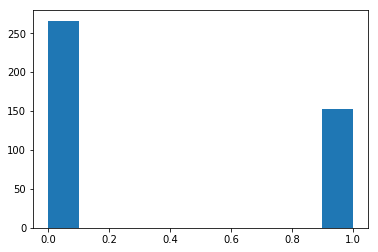

In [8]:
A=[]
B=[]
C=[]
a=calcd(0)
b=calcd(1)
c=calcd(2)
d=calcs(0)
e=calcs(1)
f=calcs(2)

for i in range(len(X_test)):
    A.append(a[i]*b[i]*c[i])

for i in range(len(X_test)):
    B.append(d[i]*e[i]*f[i])

for i in range(len(X_test)):
    if(A[i]>B[i]):
        C.append(0)
    else:
        C.append(1)
print (len(C)) 
C=np.round(C,1)
plt.hist(C)
a = np.asarray(C)
np.savetxt("gender_submission.csv", a, delimiter=",")